# Import

In [1]:
import matplotlib.pyplot as plt
from os.path import join

import sys
sys.path.append( '..' )
from script.utils import *

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set(font_scale = 2.5)
sns.set_style("white") 

# Prediction

In [34]:
root = '../scratch/TFT_baseline/figures/'

In [2]:
predictions = pd.read_csv(
    join(root, 'predictions.csv')
)
predictions = predictions[predictions['split']=='test']
predictions.drop(['TimeFromStart', 'split'], axis=1, inplace=True)

## Calculate metrics by county

In [3]:
results = pd.DataFrame({
    'FIPS':[], 'mae': [], 'rmse': [],
    'rmsle': [], 'smape': [], 'nnse': []
})

for fips, county_df in predictions.groupby('FIPS'):
    # print(fips, county_df)
    mae, rmse, rmsle, smape, nnse = calculate_result(
        county_df['Cases'], county_df['Predicted_Cases']
    )
    results.loc[results.shape[0]] = [
        fips, mae, rmse, rmsle, smape, nnse
    ]
 
results['FIPS'] = results['FIPS'].astype(int)

In [11]:
results.describe()

,FIPS,mae,rmse,rmsle,smape,nnse
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,36.323557,52.108821,1.197422,0.879562,0.610872
std,15162.508374,161.154344,214.958222,0.730511,0.391883,0.151696
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.157754
25%,18177.500000,2.466667,3.394235,0.722794,0.697093,0.511270
50%,29176.000000,6.600000,8.994400,1.094024,0.946013,0.568676
75%,45080.500000,18.800000,26.519391,1.584483,1.121948,0.672237
max,56045.000000,3900.350000,5605.111207,5.858651,1.939082,1.000000


# Social Vulnerability Index

In [4]:
svi = pd.read_csv('../../dataset_raw/Support files/SVI2020_US_COUNTY.csv')
svi['density'] =  svi['E_TOTPOP'] / svi['AREA_SQMI']

svi.describe()

,ST,STCNTY,FIPS,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE,density
count,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3.143000e+03,3143.000000,3143.000000,3143.00000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,30.271079,30374.576519,30374.576519,1124.096939,1.039037e+05,7.750875,4.404478e+04,129.369074,3.892912e+04,404.629653,2.142605e+04,1137.330576,2822.308622,301.958320,1.058763e+04,527.012727,8.133210e+03,482.360802,8927.426981,654.895323,1.666014e+04,72.392619,2.332063e+04,45.889596,1.297692e+04,627.700286,2509.951639,262.701559,4.061988e+03,293.966911,4.146291e+04,958.423481,6047.581610,289.320395,2664.504932,280.972956,1291.965956,164.551702,3291.288896,259.593064,2568.671333,269.246580,24.486828,3.129749,5.197996,1.635794,22.282342,3.216577,12.395514,1.902418,9.539548,1.846134,19.227935,0.584951,22.083710,0.510340,15.991505,1.828985,5.879033,1.697168,1.621540,0.867579,24.249061,2.729971,4.786001,

## Plot SVI vs Metric 

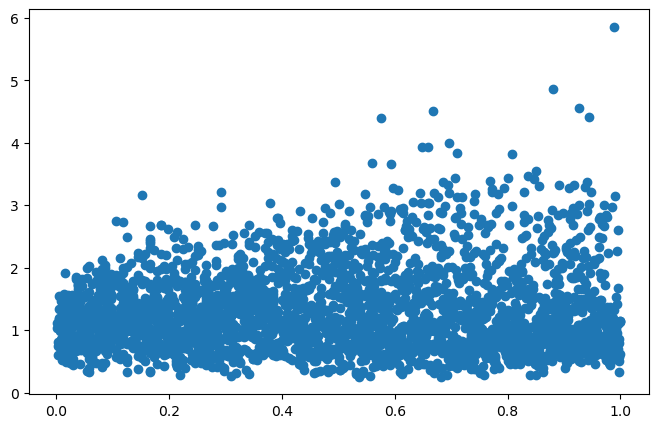

In [46]:
variable_name ='RPL_THEME3'
metric = 'rmsle'

plt.figure(figsize=(8, 5))

merged = svi[['FIPS', variable_name]].merge(results, on='FIPS', how='inner')
merged = merged[merged[metric]>0]
# plt.scatter(np.log(merged[variable_name]), merged[metric])
# plt.xlabel(f'log {variable_name}')

plt.scatter(merged[variable_name], merged[metric])
# plt.xlabel(variable_name)

# Partition by NNSE

In [18]:
higher = results[results['nnse']>=0.5]
lower = results[results['nnse']<0.5]

results['Class'] = 'High'
results.loc[results['nnse']<0.5, 'Class'] = 'Low'

In [19]:
# merge the results with the SVI features
higher_merged = higher.merge(svi, on='FIPS', how='inner')
lower_merged = lower.merge(svi, on='FIPS', how='inner')

## Difference in SVI

In [20]:
# select the socio-economic features with percentage 
higher_stats = higher_merged[[col for col in svi.columns if col.startswith('EPL_')]].describe()
lower_stats = lower_merged[[col for col in svi.columns if col.startswith('EPL_')]].describe()

diff = higher_stats - lower_stats
diff

,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,EPL_MINRTY,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,-0.006789,-0.030962,0.002970,-0.062322,-0.089821,0.030056,-0.030854,0.036651,-0.042116,-0.132656,-0.121335,0.013353,-0.026103,-0.101637,-0.009966,-0.036276
std,-0.001391,-0.011194,-0.003211,-0.012453,-0.033848,-0.020832,-0.021209,0.012962,-0.009279,-0.005775,-0.006425,0.006193,-0.004534,-0.021980,-0.002988,-0.007112
min,-0.004500,0.000000,-0.016900,-0.000600,-0.002500,-0.001600,-0.001600,-0.002200,-0.008900,0.000000,-0.008000,0.000000,0.000000,0.000000,-0.006700,0.000000
25%,-0.022075,-0.029950,0.013325,-0.059500,-0.032100,0.073200,-0.019800,0.016600,-0.054100,-0.195600,-0.131450,0.000000,-0.023125,-0.076300,-0.017800,-0.038800
50%,0.019100,-0.021700,0.031350,-0.076400,-0.162300,0.035600,-0.034400,0.042400,-0.082100,-0.230400,-0.168650,0.000000,-0.024900,-0.149900,0.000000,-0.046500
75%,-0.015300,-0.063775,-0.010050,-0.080875,-0.143200,-0.006700,-0.084300,0.052350,-0.055350,-0.128600,-0.142300,0.023900,-0.042700,-0.154950,-0.028600,-0.057000
max,0.000600,0.002900,0.000600,0.000300,0.001900,0.008300,0.002900,0.011800,0.001000,-0.000600,-0.000600,-0.000300,-0.000300,0.000600,0.000300,0.000600


In [24]:
# features with significant median difference in socio-economic scales
diff.loc[:, abs(diff.loc['50%'].round(2))>=0.15]

,EPL_UNINSUR,EPL_LIMENG,EPL_MINRTY,EPL_CROWD
count,2013.000000,2013.000000,2013.000000,2013.000000
mean,-0.089821,-0.132656,-0.121335,-0.101637
std,-0.033848,-0.005775,-0.006425,-0.021980
min,-0.002500,0.000000,-0.008000,0.000000
25%,-0.032100,-0.195600,-0.131450,-0.076300
50%,-0.162300,-0.230400,-0.168650,-0.149900
75%,-0.143200,-0.128600,-0.142300,-0.154950
max,0.001900,-0.000600,-0.000600,0.000600


### Boxplot

In [29]:
significantly_different_columns = list(
    diff.loc[:, abs(diff.loc['50%'].round(2))>=0.15].columns
)
print(significantly_different_columns)

merged = results.merge(
    svi[['FIPS']+significantly_different_columns], 
    on='FIPS', how='inner'
)

['EPL_UNINSUR', 'EPL_LIMENG', 'EPL_MINRTY', 'EPL_CROWD']


In [30]:
merged2 = []
for col in significantly_different_columns:
    temp = pd.DataFrame({
        'Class': merged['Class'],
        'Feature': col,
        'Value': merged[col]
    })

    merged2.append(temp)

merged2 = pd.concat(merged2, axis=0)

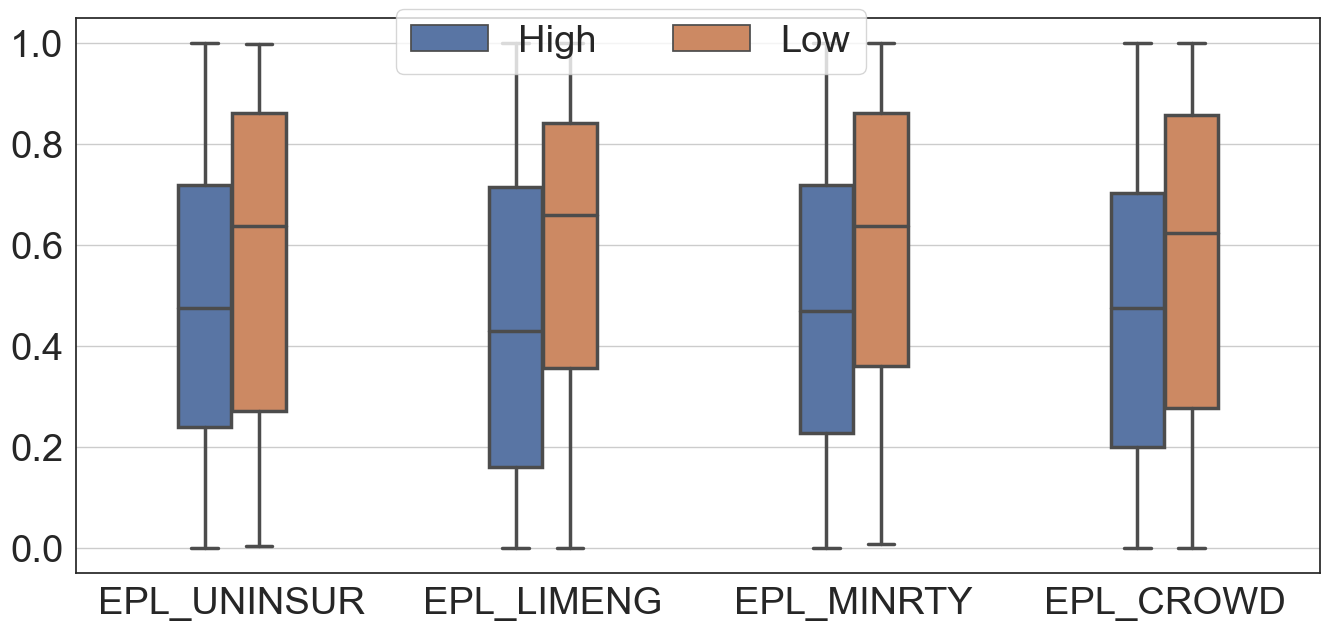

In [39]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    x = 'Feature', y = 'Value', hue='Class', 
    data = merged2, linewidth=2.5, width=0.35
)
plt.grid(True, axis='y')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper right', ncol=2, bbox_to_anchor=(0.65, 1.05),fancybox=True)
plt.tight_layout()
plt.savefig(join(root, 'NNSE_comparison_SVI.jpg'), dpi=200)

## Difference in county health ranking

In [40]:
health = pd.read_csv('../../Archives/dataset_additional (not used)/cleaned/Health rank measure.csv')
health.head(3)

,FIPS,Years of Potential Life Lost Rate,% Fair or Poor Health,% Smokers,% Adults with Obesity,Primary Care Physicians Rate,% Flu Vaccinated,% Unemployed,Average Daily PM2.5,% Severe Housing Problems
0,1001,8128.591190,20.882987,18.081557,33.3,45.04180,41.0,3.629079,11.7,14.663462
1,1003,7354.122530,17.509134,17.489033,31.0,72.89727,44.0,3.615382,10.3,13.566201
2,1005,10253.573403,29.591802,21.999985,41.7,31.65809,37.0,5.171384,11.5,14.583333


In [41]:
from sklearn.preprocessing import MinMaxScaler

health_features = [
    col for col in health.columns if col!='FIPS'
]

# scale down within [0, 1] range
health[health_features] = MinMaxScaler().fit_transform(health[health_features])

In [42]:
# merge the attentions with the SVI features
higher_merged = higher.merge(health, on='FIPS', how='inner')
lower_merged = lower.merge(health, on='FIPS', how='inner')

# select the socio-economic features with percentage 
higher_stats = higher_merged[health_features].describe()
lower_stats = lower_merged[health_features].describe()

diff = higher_stats - lower_stats

# No significant difference found.
diff

,Years of Potential Life Lost Rate,% Fair or Poor Health,% Smokers,% Adults with Obesity,Primary Care Physicians Rate,% Flu Vaccinated,% Unemployed,Average Daily PM2.5,% Severe Housing Problems
count,1803.000000,2012.000000,2012.000000,2012.000000,1921.000000,2004.000000,2011.000000,2000.000000,2012.000000
mean,0.010256,-0.007310,0.036272,0.001510,0.001725,0.015060,-0.011531,0.023720,-0.017159
std,0.006336,-0.026501,0.002442,-0.003095,-0.001629,-0.008273,-0.014955,-0.006137,-0.011269
min,-0.024197,-0.047558,-0.063711,-0.048565,0.000000,-0.096774,-0.015068,-0.023952,-0.022350
25%,0.004366,0.008174,0.019253,0.004415,0.002633,0.016129,-0.008439,0.028443,-0.016481
50%,0.014067,0.012936,0.044578,0.017660,0.003737,0.016129,-0.007905,0.020958,-0.016792
75%,0.020513,0.001120,0.066560,0.000000,0.003121,0.000000,-0.005839,0.023952,-0.018152
max,0.244028,-0.084096,0.078312,0.088300,-0.161419,0.064516,0.097429,-0.179641,0.157078
